## Moving Average as Prediction

In [39]:
import math
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [52]:
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

In [53]:
# prepare situation
X = series.values
X[:5]

array([35, 32, 30, 31, 44])

In [54]:
window = 3
history = [X[i] for i in range(window)]
history

[35, 32, 30]

In [55]:
test = [X[i] for i in range(window, len(X))]
test[:5]

[31, 44, 29, 45, 43]

In [56]:
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    print(f"History = {history}")
    length = len(history)
    print(f'Length of History = {length}')
    yhat = np.mean([history[i] for i in range(length-window, length)])
    print(f'yhat = {[history[i] for i in range(length-window, length)]}')
    print(f'yhat mean = {yhat}')
    obs = test[t]
    print(f'obs = {test[t]}')
    print('Appending yhat...')
    predictions.append(yhat)
    print(f'predictions = {predictions}')
    print('Appending history...')
    history.append(obs)
    print(f'Updated history = {history}')
    print('predicted (moving average)=%f, actual=%f' % (yhat, obs))
    print('\n')

History = [35, 32, 30]
Length of History = 3
yhat = [35, 32, 30]
yhat mean = 32.333333333333336
obs = 31
Appending yhat...
predictions = [32.333333333333336]
Appending history...
Updated history = [35, 32, 30, 31]
predicted (moving average)=32.333333, actual=31.000000


History = [35, 32, 30, 31]
Length of History = 4
yhat = [32, 30, 31]
yhat mean = 31.0
obs = 44
Appending yhat...
predictions = [32.333333333333336, 31.0]
Appending history...
Updated history = [35, 32, 30, 31, 44]
predicted (moving average)=31.000000, actual=44.000000


History = [35, 32, 30, 31, 44]
Length of History = 5
yhat = [30, 31, 44]
yhat mean = 35.0
obs = 29
Appending yhat...
predictions = [32.333333333333336, 31.0, 35.0]
Appending history...
Updated history = [35, 32, 30, 31, 44, 29]
predicted (moving average)=35.000000, actual=29.000000


History = [35, 32, 30, 31, 44, 29]
Length of History = 6
yhat = [31, 44, 29]
yhat mean = 34.666666666666664
obs = 45
Appending yhat...
predictions = [32.333333333333336, 31.

Appending history...
Updated history = [35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50, 43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44, 38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48, 37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32, 39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35, 56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34, 34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58, 51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38, 24, 34, 43, 36, 55, 41, 45]
predicted (moving average)=44.000000, actual=45.000000


History = [35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50, 43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44, 38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48, 37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32, 39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 

History = [35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50, 43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44, 38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48, 37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32, 39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35, 56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34, 34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58, 51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38, 24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46, 34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40, 39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42, 57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42, 35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44, 48, 46, 44, 37, 39, 44, 45, 33, 44, 38, 46, 46, 40, 39, 44, 48, 50, 41, 42, 51, 41, 44, 38, 68, 40, 42, 5

In [57]:
pd.DataFrame({"predictions":predictions, "actual":test})

,predictions,actual
0,32.333333,31
1,31.000000,44
2,35.000000,29
3,34.666667,45
4,39.333333,43
...,...,...
357,38.666667,37
358,38.333333,52
359,41.000000,48
360,45.666667,55


Test RMSE: 7.834


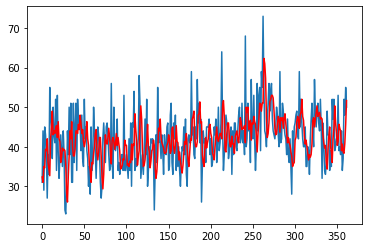

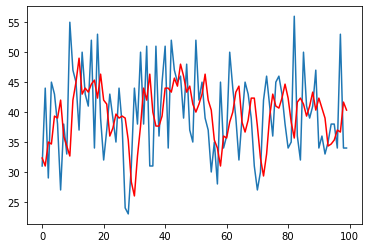

In [58]:
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()

# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color = 'red')
plt.show()